# Import Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [92]:
df_headers = ['molecule_name', 'conformation_name'] + [f'f{i}' for i in range(1, 167)] + ['class']
df_train = pd.read_csv('clean2.data', delimiter=',', names=df_headers)
df_test = pd.read_csv('clean1.data', delimiter=',', names=df_headers)

In [93]:
X_train = df_train.drop(columns=['molecule_name', 'conformation_name', 'class'])
y_train = df_train['class'].to_numpy()
X_test = df_test.drop(columns=['molecule_name', 'conformation_name', 'class'])
y_test = df_test['class'].to_numpy()

# Standardization

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Implementation

In [127]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [141]:
def compute_cost(X, y, w, b=0):
    n_samples, _ = X.shape
    w = w.reshape(-1, 1)

    z = X@w + b
    a = sigmoid(z.reshape(-1))
    loss = -y*np.log(a) - (1-y)*np.log(1-a)
    total_cost = np.sum(loss) / n_samples
    
    return total_cost

In [132]:
def compute_gradient(X, y, w, b=0):
    n_samples, _ = X.shape
    dw = np.zeros(w.shape)
    db = 0.
    w = w.reshape(-1, 1)

    z = X@w + b
    a = sigmoid(z.reshape(-1))
    err = a - y

    dw = np.sum(err.reshape(-1,1)*X, axis=0) / n_samples
    db = np.sum(err) / n_samples

    return dw, db

In [192]:
def logistic_regression(X, y, learning_rate, num_iterations, add_intercept=True):
    _, n_features = X.shape

    cost_history = np.zeros(num_iterations, dtype=np.float64) # cost history
    w, b = np.zeros(n_features), 0. # parameters

    for iter in range(num_iterations):
        dw, db = compute_gradient(X, y, w, b)
        w -= learning_rate*dw
        b -= learning_rate*db if add_intercept else 0
        cost_history[iter] = compute_cost(X, y, w, b)
        
        if (iter+1) % (num_iter//10) == 0:
            print(f'iteration: {iter+1:>5}/{num_iterations},\tcost: {cost_history[iter]:>6.5f}')

    return w, b, cost_history

In [186]:
def predict(X, w, b, threshold=0.5):
    w = w.reshape(-1, 1)
    z = X@w + b
    a = sigmoid(z.reshape(-1))
    pred = (a >= threshold)
    
    return pred.astype(float)

In [187]:
def score(y_true, y_pred):
    n_samples = y_true.shape
    score = np.sum(y_pred == y_true) / n_samples
    
    return score.item()

# Model Training

In [245]:
num_iter = 3000
lr_high, lr_best, lr_low = 1.2, 0.1, 0.001

## High Learning Rate

In [241]:
W_final_high, b_final_high, history_high = logistic_regression(X_train, y_train, lr_high, num_iter)
y_pred_high = predict(X_test, W_final_high, b_final_high)
score_high = score(y_test, y_pred_high)
print('Model score with high learning rate:', score_high)

iteration:   300/3000,	cost: 0.16805
iteration:   600/3000,	cost: 0.13933
iteration:   900/3000,	cost: 0.13425
iteration:  1200/3000,	cost: 0.13207
iteration:  1500/3000,	cost: 0.13385
iteration:  1800/3000,	cost: 0.12571
iteration:  2100/3000,	cost: 0.12465
iteration:  2400/3000,	cost: 0.12361
iteration:  2700/3000,	cost: 0.12290
iteration:  3000/3000,	cost: 0.12172
Model score with high learning rate: 0.7289915966386554


## Best Learning Rate

In [235]:
W_final_best, b_final_best, history_best = logistic_regression(X_train, y_train, lr_best, num_iter)
y_pred_best = predict(X_test, W_final_best, b_final_best)
score_best = score(y_test, y_pred_best)
print('Model score with best learning rate:', score_best)

iteration:   300/3000,	cost: 0.19395
iteration:   600/3000,	cost: 0.17483
iteration:   900/3000,	cost: 0.16624
iteration:  1200/3000,	cost: 0.16080
iteration:  1500/3000,	cost: 0.15687
iteration:  1800/3000,	cost: 0.15384
iteration:  2100/3000,	cost: 0.15139
iteration:  2400/3000,	cost: 0.14937
iteration:  2700/3000,	cost: 0.14766
iteration:  3000/3000,	cost: 0.14618
Model score with best learning rate: 0.7394957983193278


## Low Learning Rate

In [266]:
W_final_low, b_final_low, history_low = logistic_regression(X_train, y_train, lr_low, num_iter)
y_pred_low = predict(X_test, W_final_low, b_final_low)
score_low = score(y_test, y_pred_low)
print('Model score with low learning rate:', score_low)

iteration:   300/3000,	cost: 0.61672
iteration:   600/3000,	cost: 0.56737
iteration:   900/3000,	cost: 0.52825
iteration:  1200/3000,	cost: 0.49614
iteration:  1500/3000,	cost: 0.46914
iteration:  1800/3000,	cost: 0.44606
iteration:  2100/3000,	cost: 0.42607
iteration:  2400/3000,	cost: 0.40858
iteration:  2700/3000,	cost: 0.39316
iteration:  3000/3000,	cost: 0.37946
Model score with low learning rate: 0.7058823529411765


## Plotting Cost

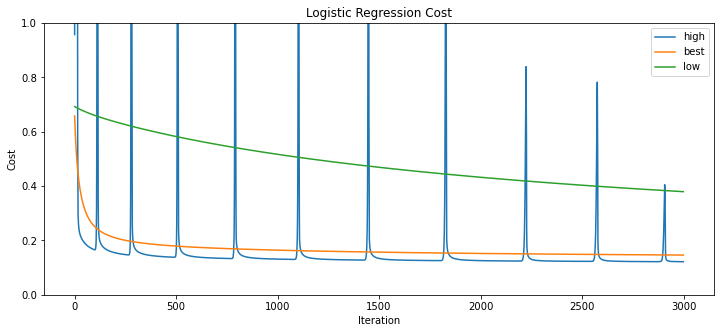

In [267]:
plt.figure(figsize=(12, 5))
plt.plot(list(range(num_iter)), history_high)
plt.plot(list(range(num_iter)), history_best)
plt.plot(list(range(num_iter)), history_low)
plt.ylim(0, 1)
plt.legend(['high', 'best', 'low'])
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title(f'Logistic Regression Cost')
plt.show()

# Evaluation Metrics

In [276]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred_best))
print('Precision:', precision_score(y_test, y_pred_best))
print('Recall:', recall_score(y_test, y_pred_best))
print('F1 Score:', f1_score(y_test, y_pred_best))

Accuracy: 0.7394957983193278
Precision: 0.946236559139785
Recall: 0.4251207729468599
F1 Score: 0.5866666666666667


Accuracy computes the set of labels predicted for a sample that exactly matches the corresponding set of labels in `y_true`.

The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives.  
Recall is the ability of the classifier to find all the positive samples.

The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives.  
Precision is the ability of the classifier not to label as positive a sample that is negative.

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.  
The formula for the F1 score is:
`F1 = 2 * (precision * recall) / (precision + recall)`